In [1]:
# EDA Assignment 1
#Title: Heart Failure Clinical Records Dataset

In [2]:
# importing some libraryies for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the DataSet
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
# Display the first 5 rows of DataSet
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# Get information about DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Summary Stataics of numerical Colums
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


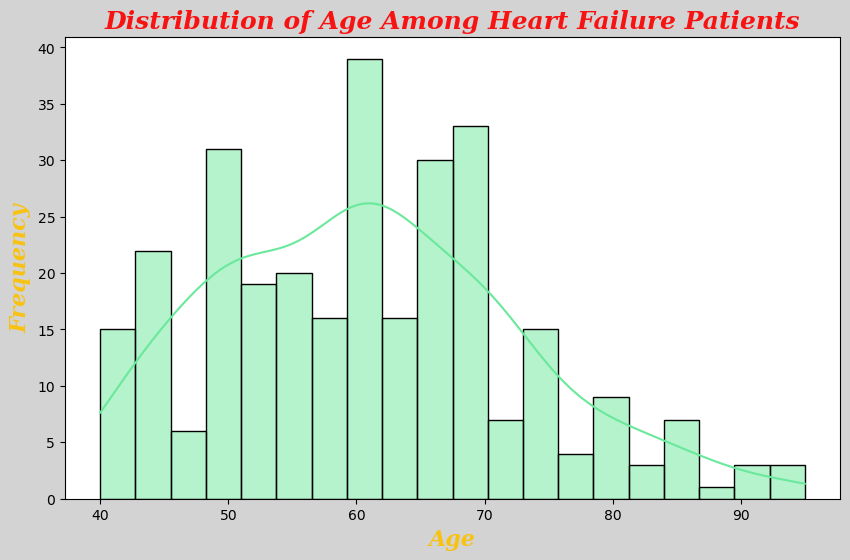

In [7]:
'''1.What is the distribution of age among heart failure patients in the dataset?'''


# Ans
plt.figure(figsize = (10,6),  facecolor='lightgray')
sns.histplot(data = df, x = 'age', bins = 20, kde = True, color= '#6AE89B')

# Set the font properties
font = FontProperties()
font.set_family('serif')  # Change font family here
font.set_style('italic')  # Change font style here
font.set_weight('bold')   # Change font weight here


plt.title("Distribution of Age Among Heart Failure Patients", color='#F81313',  fontproperties=font, fontsize= 18)
plt.xlabel('Age', color = '#F8C213',  fontproperties=font, fontsize=16)
plt.ylabel('Frequency', color= '#F8C213',  fontproperties=font, fontsize=16)
plt.show()

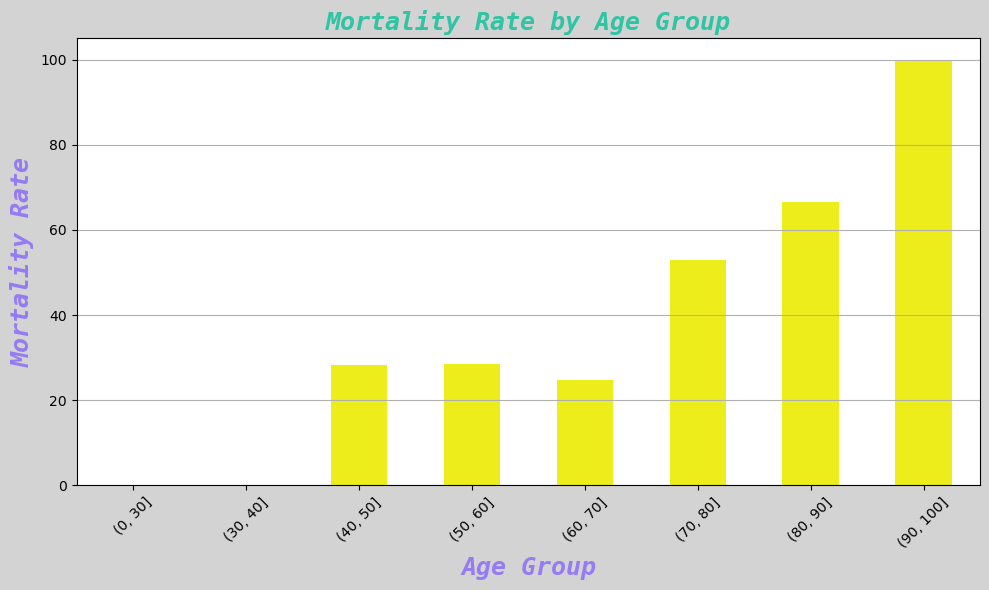

In [8]:
'''2.How does the death rate vary with age?'''

# Ans
'''
To analyze how the death rate varies with age in your heart failure dataset, 
we can use statistical methods to calculate mortality rates across different age groups.
'''

age_groups = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100])
mortality_rate = df.groupby(age_groups)['DEATH_EVENT'].mean() * 100  # Convert to percentage

# Plotting the mortality rate by age group
plt.figure(figsize=(10, 6), facecolor= 'lightgrey')
mortality_rate.plot(kind='bar', color='#EEED1C')


# Set the font properties
font = FontProperties()
font.set_family('Monospace')  # Change font family here
font.set_style('italic')  # Change font style here
font.set_weight('bold')   # Change font weight here


plt.title('Mortality Rate by Age Group',color='#2FC4A4',  fontproperties=font, fontsize= 18)
plt.xlabel('Age Group',color='#957BF4',  fontproperties=font, fontsize= 18)
plt.ylabel('Mortality Rate', color='#957BF4',  fontproperties=font, fontsize= 18)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [9]:
'''3. What is the percentage of male and female patients in the dataset?'''


# Ans
# Count the number of male and female patients
gender_counts = df['sex'].value_counts()

# Calculate the percentage of male and female patients
total_patients = len(df)
male_percentage = (gender_counts[1] / total_patients) * 100
female_percentage = (gender_counts[0] / total_patients) * 100

print(f"Percentage of Male Patients: {male_percentage:.2f}%")
print(f"Percentage of Female Patients: {female_percentage:.2f}%")

Percentage of Male Patients: 64.88%
Percentage of Female Patients: 35.12%


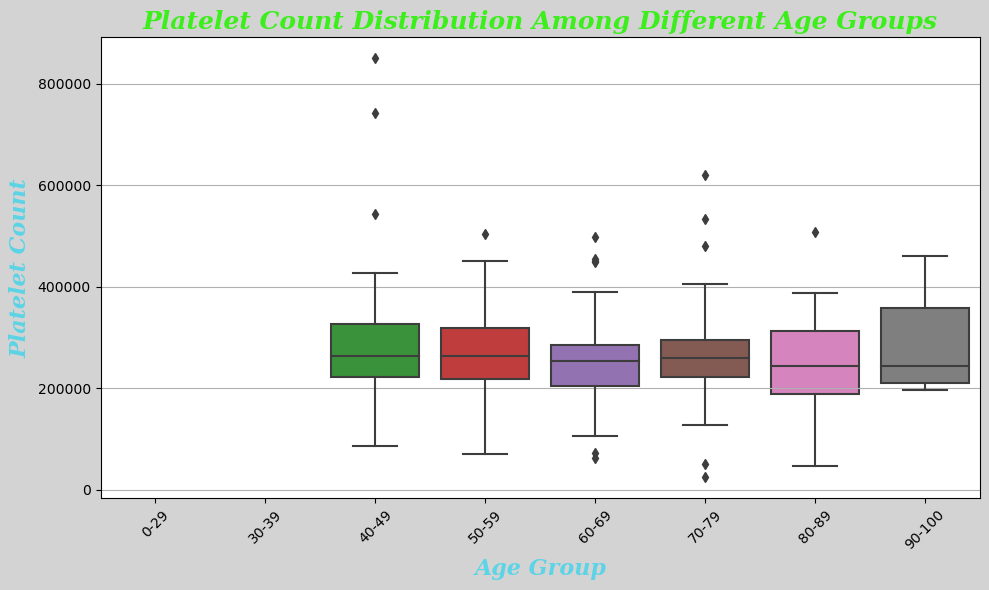

In [10]:
'''4.How does the platelet count vary among different age groups?'''


# Ans
# Define age groups
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate platelet count statistics by age group
platelet_stats = df.groupby('age_group')['platelets'].describe()

# Plotting the platelet count distribution by age group
plt.figure(figsize=(10, 6), facecolor='lightgrey')
sns.boxplot(data=df, x='age_group', y='platelets', order=age_labels)

# Set the font properties
font = FontProperties()
font.set_family('serif')  # Change font family here
font.set_style('italic')  # Change font style here
font.set_weight('bold')   # Change font weight here


plt.title('Platelet Count Distribution Among Different Age Groups',  color='#3CEE1C',  fontproperties=font, fontsize= 18)
plt.xlabel('Age Group' , color='#5CD3E6',  fontproperties=font, fontsize= 16)
plt.ylabel('Platelet Count', color='#5CD3E6',  fontproperties=font, fontsize= 16)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

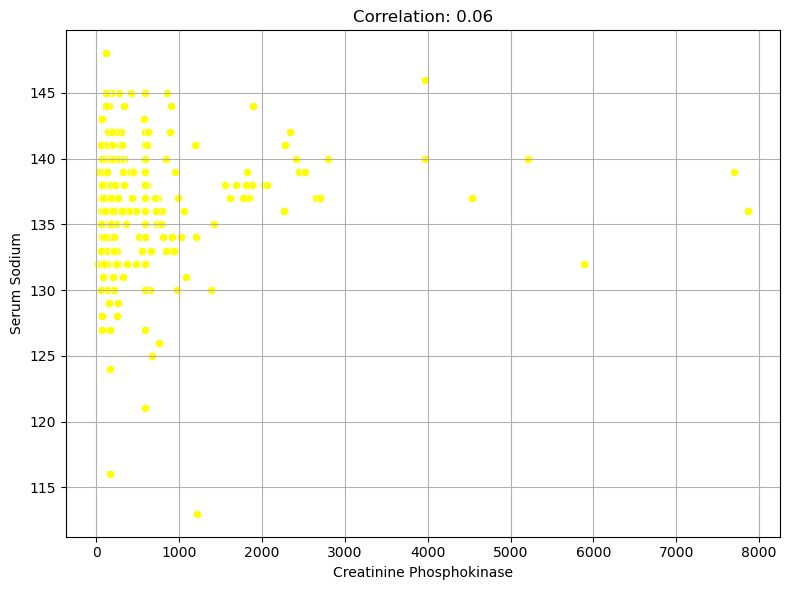

Pearson Correlation Coefficient: 0.06


In [11]:
'''5. Is there a correlation between creatinine and sodium levels in the blood?'''


# ans
# Calculate the Pearson correlation coefficient between creatinine and sodium
correlation = df['creatinine_phosphokinase'].corr(df['serum_sodium'])

# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 6), )
sns.scatterplot(data=df, x='creatinine_phosphokinase', y='serum_sodium', color="yellow")
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Serum Sodium')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Pearson Correlation Coefficient: {correlation:.2f}")

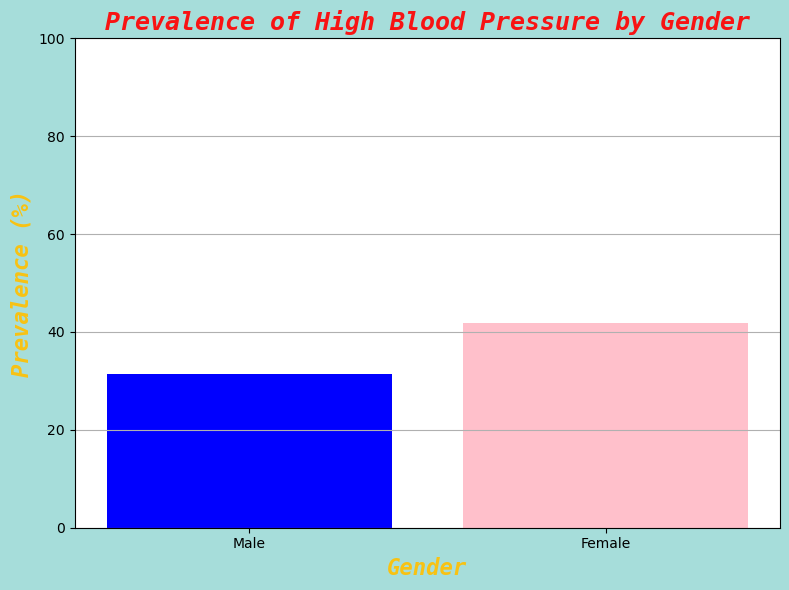

Prevalence of High Blood Pressure Among Male Patients: 31.44%
Prevalence of High Blood Pressure Among Female Patients: 41.90%


In [12]:
'''6. How does the prevalence of high blood pressure differ between male and female patients?'''

# Ans
# Calculate prevalence of high blood pressure for male and female patients
male_high_bp = df[df['sex'] == 1]['high_blood_pressure'].mean() * 100  # 1 represents male
female_high_bp = df[df['sex'] == 0]['high_blood_pressure'].mean() * 100  # 0 represents female

# Create a bar chart to visualize the prevalence of high blood pressure by gender
plt.figure(figsize=(8, 6),facecolor='#A6DDDA')
plt.bar(['Male', 'Female'], [male_high_bp, female_high_bp], color=['blue', 'pink'])

# Set the font properties
font = FontProperties()
font.set_family('Monospace')  # Change font family here
font.set_style('italic')  # Change font style here
font.set_weight('bold')   # Change font weight here


plt.title('Prevalence of High Blood Pressure by Gender',color='#F81313',  fontproperties=font, fontsize= 18)
plt.xlabel('Gender',color = '#F8C213',  fontproperties=font, fontsize=16)
plt.ylabel('Prevalence (%)',color= '#F8C213',  fontproperties=font, fontsize=16)
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(f"Prevalence of High Blood Pressure Among Male Patients: {male_high_bp:.2f}%")
print(f"Prevalence of High Blood Pressure Among Female Patients: {female_high_bp:.2f}%")

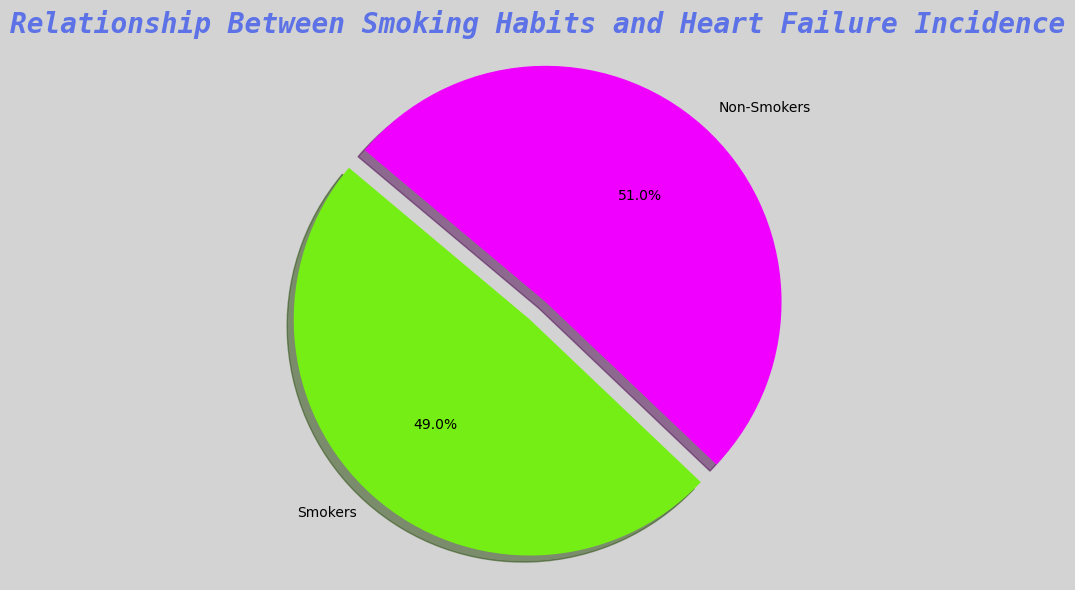

Heart Failure Incidence Among Smokers: 31.25%
Heart Failure Incidence Among Non-Smokers: 32.51%


In [13]:
'''7. What is the relationship between smoking habits and the occurrence of heart failure?'''


# Ans
# Calculate incidence rates of heart failure among smokers and non-smokers
smokers = df[df['smoking'] == 1]  # Assuming 'smoking' is a binary column where 1 represents smokers
non_smokers = df[df['smoking'] == 0]

smoking_rate = smokers['DEATH_EVENT'].mean() * 100  # Percentage of heart failure among smokers
non_smoking_rate = non_smokers['DEATH_EVENT'].mean() * 100  # Percentage of heart failure among non-smokers

# Create a pie chart to visualize the relationship between smoking and heart failure incidence
labels = ['Smokers', 'Non-Smokers']
sizes = [smoking_rate, non_smoking_rate]
colors = ['#74ee15', '#f000ff']
explode = (0.1, 0)  # explode the 'Smokers' slice

plt.figure(figsize=(8, 6),facecolor='lightgrey')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Relationship Between Smoking Habits and Heart Failure Incidence',color='#5C72E6',  fontproperties=font, fontsize= 20)

font = FontProperties()
font.set_family('Monospace')  # Change font family here
font.set_style('italic')  # Change font style here
font.set_weight('bold')   # Change font weight here


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

print(f"Heart Failure Incidence Among Smokers: {smoking_rate:.2f}%")
print(f"Heart Failure Incidence Among Non-Smokers: {non_smoking_rate:.2f}%")

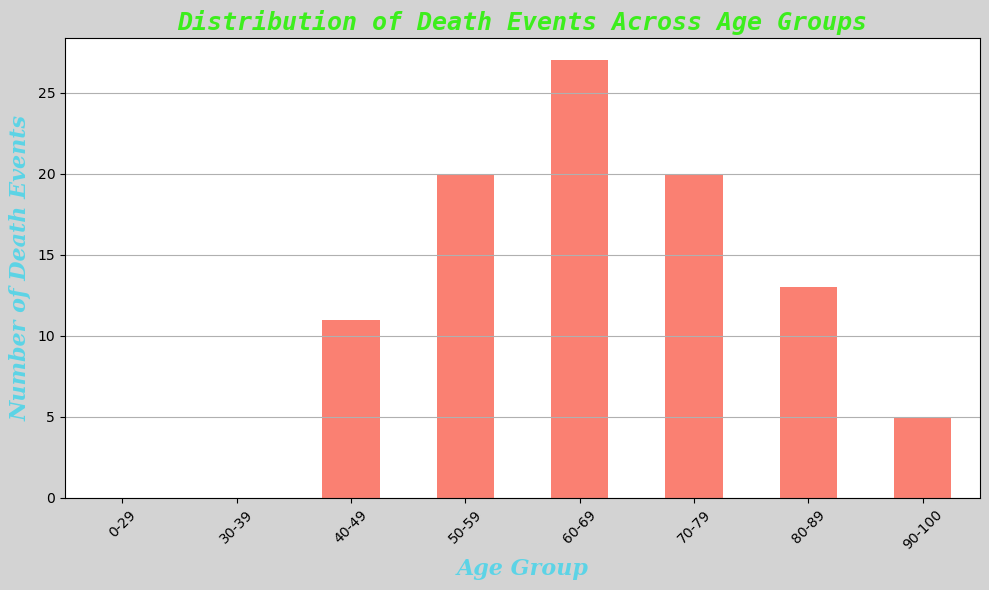

In [14]:
'''8. Are there any noticeable patterns in the distribution of death events across different age groups?'''


# Ans
# Define age groups
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate death event distribution by age group
death_event_counts = df.groupby('age_group')['DEATH_EVENT'].sum()

# Plotting the distribution of death events across age groups using a bar plot
plt.figure(figsize=(10, 6),facecolor='lightgrey')
death_event_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Death Events Across Age Groups',  color='#3CEE1C',  fontproperties=font, fontsize= 18)
font = FontProperties()
font.set_family('serif')  # Change font family here
font.set_style('italic')  # Change font style here
font.set_weight('bold')   # Change font weight here


plt.xlabel('Age Group', color='#5CD3E6',  fontproperties=font, fontsize= 16)
plt.ylabel('Number of Death Events', color='#5CD3E6',  fontproperties=font, fontsize= 16)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
'''9.Is there any significant difference in ejection fraction between patients with and without diabetes?'''


# ans

import pandas as pd
from scipy.stats import ttest_ind

'''
To determine if there's a significant difference in ejection fraction between patients with and without diabetes,
we can conduct a statistical analysis, such as a t-test or Mann-Whitney U test, 
depending on the distribution of your data and assumptions about its normality.
'''

# Split the data into two groups based on diabetes status
diabetes_yes = df[df['diabetes'] == 1]['ejection_fraction']
diabetes_no = df[df['diabetes'] == 0]['ejection_fraction']

# Perform a t-test to compare ejection fraction between the two groups
t_stat, p_value = ttest_ind(diabetes_yes, diabetes_no, equal_var=False)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"There is a significant difference in ejection fraction between patients with and without diabetes (p-value: {p_value:.4f})")
else:
    print(f"There is no significant difference in ejection fraction between patients with and without diabetes (p-value: {p_value:.4f})")

There is no significant difference in ejection fraction between patients with and without diabetes (p-value: 0.9325)


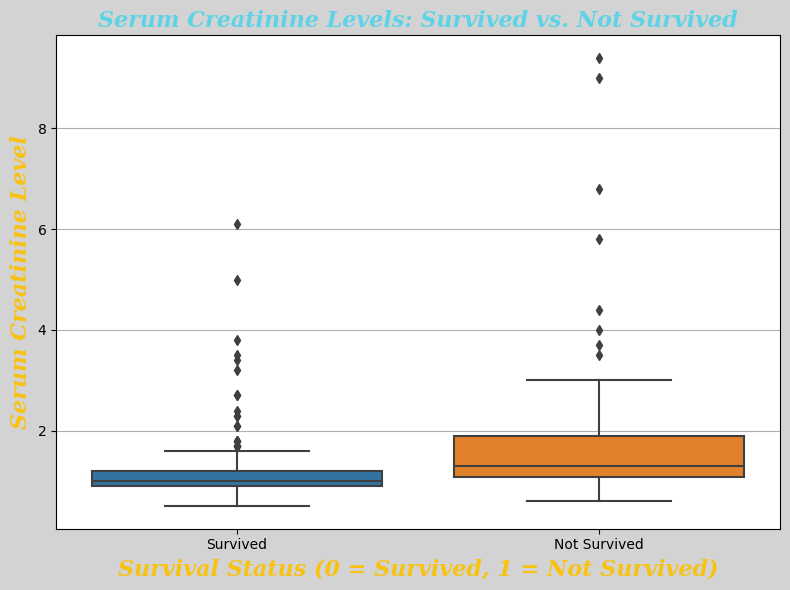

In [16]:
'''10. How does the serum creatinine level vary between patients who survived and those who did not?'''


# ans
# Split the data into two groups based on survival status
survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

# Plotting box plots to compare serum creatinine levels between survival groups
plt.figure(figsize=(8, 6),facecolor='lightgrey')
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels: Survived vs. Not Survived',color='#5CD3E6',  fontproperties=font, fontsize= 16)
# Set the font properties
font = FontProperties()
font.set_family('serif')  # Change font family here
font.set_style('italic')  # Change font style here
font.set_weight('bold')   # Change font weight here

plt.xlabel('Survival Status (0 = Survived, 1 = Not Survived)',color = '#F8C213',  fontproperties=font, fontsize=16)
plt.ylabel('Serum Creatinine Level',color = '#F8C213',  fontproperties=font, fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Survived', 'Not Survived'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()